# Introduction

We want to know what the distribution is in hours of electricity provided each night.
This is similar to the work done in `2017-07-04-blackout-duration-details` but we want to look at uptime duration within a day.

# Method

- create a boolean of electricity availability using `create_uptime_boolean_timestamp`
- aggregate boolean over each day to get uptime
- plot CDF of uptimes

# Notes

- do I have a function that can do this?  what is the right algorithm?  is the presence of a time stamp enough?  (i think so)
- data gaps are interpreted as downtime here
- what is the best way to present these CDFs?
- what is the best way to present the insight the CDFs supply?
- what would this look like if I only considered days without data gaps?

# Results

- We can see the most frequent usage of 5 to 6 hours clearly in two microgrids

# Next Work

- look into start and end time variations with scatterplot for each period of service

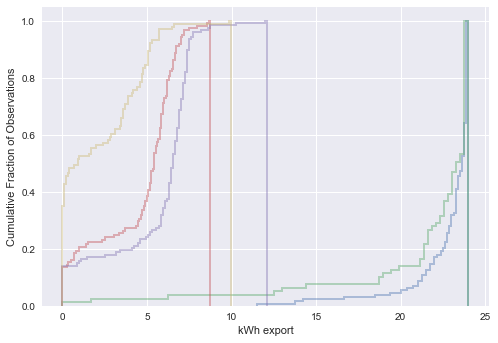

In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import WP19_analysis as wpa

fig, ax = plt.subplots()
ax.set_xlabel('Hours of Service')
ax.set_ylabel('Cumulative Fraction of Observations')
for rfd in wpa.raw_file_data:
    vname = rfd['village_name']
    energy_data = wpa.load_timeseries_file(vname + '-clean.csv')
    messages = wpa.load_message_file(vname + '-messages.csv')
    uptimes = wpa.create_uptime_boolean_timestamp(energy_data)
    uptimes = uptimes.groupby(uptimes.index.date).sum()/60
    sns.distplot(uptimes, 
                 hist_kws={'cumulative':True,
                           'histtype':'step',
                           'linewidth':2},
                kde=False,
                norm_hist=True,
                bins=100,
                ax=ax)
fig.savefig('../plots/uptime_CDF.png')